## Ahmed Mahgoub's Notebook

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, classification_report, accuracy_score,  confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64

In [4]:
df = pd.read_csv('../../data/clean_Tweets.csv')  # Assuming the file is accessible

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['text']).toarray()
y = df['airline_sentiment']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)
y_test_proba = rf_classifier.predict_proba(X_test)

In [6]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.91      0.85      1816
     neutral       0.63      0.44      0.52       612
    positive       0.72      0.60      0.66       458

    accuracy                           0.76      2886
   macro avg       0.71      0.65      0.67      2886
weighted avg       0.75      0.76      0.75      2886



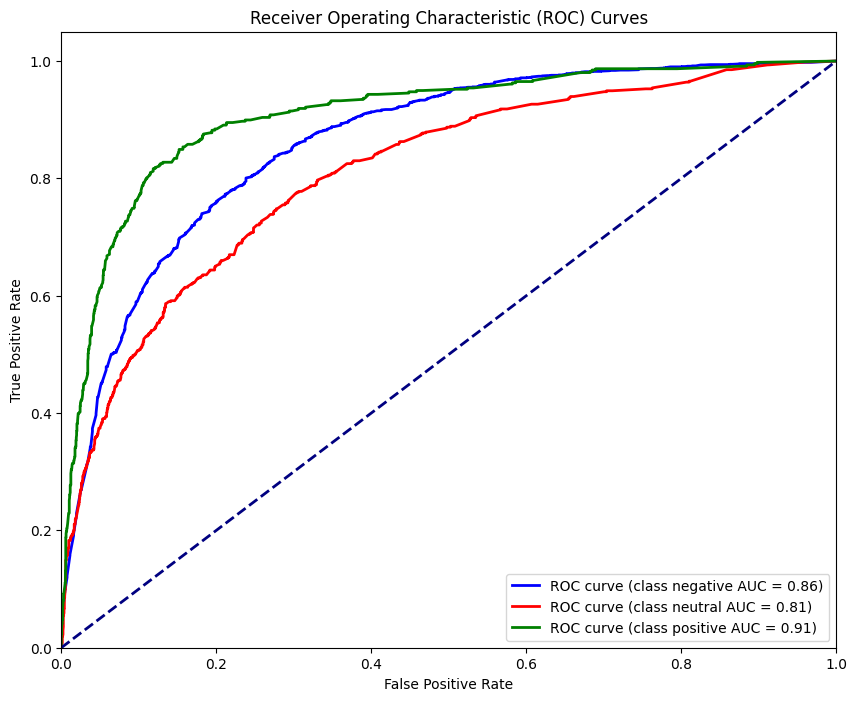

In [7]:
plt.figure(figsize=(10, 8))
classes = np.unique(y)
n_classes = len(classes)
colors = ['blue', 'red', 'green']

from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_proba = rf_classifier.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'ROC curve (class {classes[i]} AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")

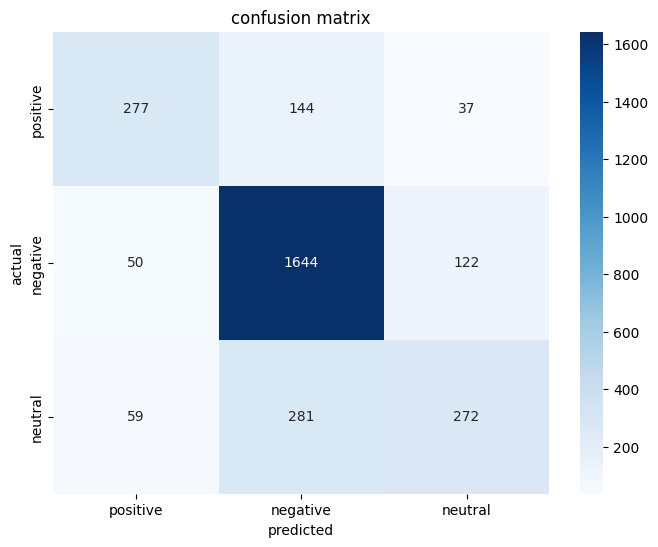

In [8]:
confusion_matrix = confusion_matrix(y_test, y_test_pred, labels=['positive', 'negative', 'neutral'])
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative', 'neutral'], yticklabels=['positive', 'negative', 'neutral'])
plt.title('confusion matrix')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [9]:
# Print metrics
print("\nModel Performance Metrics:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Model Performance Metrics:
Train Accuracy: 0.9932
Test Accuracy: 0.7599
Precision: 0.7477
Recall: 0.7599
F1 Score: 0.7473
